# 유튜브로 노래 다운로드 및 mp3 파일로 변환

In [2]:
import selenium
import time
import pandas as pd
from bs4 import BeautifulSoup as bs
import requests
from itertools import repeat
from selenium import webdriver   # selenium 프레임 워크에서 webdriver 가져오기
global tmp
import clipboard
    
def extrct_song_link_from_Youtube(song_name):
    url = 'https://www.youtube.com/results?search_query=' + song_name
    driver = webdriver.Chrome('C:/real_anaconda3/chromedriver.exe')  # 크롬 드라이버로 크롬 켜기
    driver.get(url) 
    
    driver.find_element_by_xpath('/html/body/ytd-app/div[1]/ytd-page-manager/ytd-search/div[1]/ytd-two-column-search-results-renderer/div[2]/div/ytd-section-list-renderer/div[2]/ytd-item-section-renderer/div[3]/ytd-video-renderer[1]/div[1]/div/div[1]').click()
    time.sleep(2)
    driver.find_element_by_xpath('/html/body/ytd-app/div[1]/ytd-page-manager/ytd-watch-flexy/div[5]/div[1]/div/div[2]/ytd-watch-metadata/div/div[2]/div[2]/div/div/ytd-menu-renderer/div[1]/ytd-button-renderer/yt-button-shape/button').click()
    time.sleep(1)
    driver.find_element_by_xpath('/html/body/ytd-app/ytd-popup-container/tp-yt-paper-dialog[1]/ytd-unified-share-panel-renderer/div[2]/yt-third-party-network-section-renderer/div[2]/yt-copy-link-renderer/div/yt-button-renderer/yt-button-shape/button').click()
    
    tmp = clipboard.paste()
    return tmp

from pytube import YouTube

song_name = input("노래 제목을 입력해주세요: ")
song_link = extrct_song_link_from_Youtube(song_name)

YouTube(song_link).streams.first().download(filename = song_name + ".3gpp")

#폴더 내 방금 다운받은 동영상 찾아내기
import os
import moviepy.editor as mp

path = os.getcwd()

file_list = os.listdir(path)

song_list = []
for i in range(0, len(file_list)):
    movie_name = path + '/' + song_name + ".3gpp"
    song_target = movie_name[41:]
    song_full_info = song_target + ".mp3"
        
#폴더 내 방금 다운받은 노래 mp3 변환
clip = mp.VideoFileClip(song_target)
clip.audio.write_audiofile(song_target + ".mp3")

노래 제목을 입력해주세요: alan walker the drum


chunk:   1%|▉                                                             | 62/4140 [00:00<00:06, 617.06it/s, now=None]

MoviePy - Writing audio in alan walker the drum.3gpp.mp3


MoviePy - Done.


# 다운 받은 노래 mr 제거 및 wav 형태로 변환

In [4]:
import spleeter
import ffmpeg

import os
import subprocess

path = os.getcwd()

path_dir = path
file_list = os.listdir(path_dir)

filename_list = []
filename_f_list = []
for i in range(0, len(file_list)):
    filename = "C:/Users/dltkd/!Find_Melody/song_process/" + file_list[i]
    if filename[41:] == song_full_info:
        filename_list.append(filename)
    
for i in range(0, len(filename_list)):
    batcmd = 'spleeter separate -o C:/Users/dltkd/!Find_Melody/song_data -p spleeter:2stems-16kHz "%s"' % (filename_list[i])
    result = subprocess.check_output(batcmd, shell = True)
    print(result.decode('cp949'))
    
path_dir = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp"
file_list = os.listdir(path_dir)

old_name = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp/vocals.wav"
new_name = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp/" + song_name + ".wav"

os.rename(old_name, new_name)

INFO:spleeter:File C:\Users\dltkd\!Find_Melody\song_data\alan walker the drum.3gpp/vocals.wav written succesfully
INFO:spleeter:File C:\Users\dltkd\!Find_Melody\song_data\alan walker the drum.3gpp/accompaniment.wav written succesfully



FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/dltkd/!Find_Melody/song_data/alan walker the drum.3gpp/vocals.wav' -> 'C:/Users/dltkd/!Find_Melody/song_data/alan walker the drum.3gpp/alan walker the drum.wav'

In [5]:
filename_list[0]

'C:/Users/dltkd/!Find_Melody/song_process/alan walker the drum.3gpp.mp3'

# 다운로드 받은 노래 pitch값 추출, 추출한 값 csv로 변환 및 저장

In [6]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import shutil

file_n = "C:/Users/dltkd/!Find_Melody/song_data/" + song_name + ".3gpp/" + song_name + ".wav"

snd = parselmouth.Sound(file_n)
pitch = snd.to_pitch()

pitch_xs = (list(pitch.xs()))
pitch_values = pitch.selected_array['frequency']

pitch_xs_2 = []
for i in range(0, len(pitch_xs)):
    pitch_xs_temp = str(pitch_xs[i])
    pitch_xs_2.insert(len(pitch_xs_2), pitch_xs_temp)

pitch_values_NoNull = []
del_target = []

for i in range(0, len(pitch_values)):
    if pitch_values[i] != 0:
        pitch_values_NoNull.append(pitch_values[i])
    else:
        del_target.append(i)

for i in range(0, len(del_target)):
    pitch_xs_2.remove(str(pitch_xs[del_target[i]]))

pitch_xs_3 = []
for i in range(0, len(pitch_xs_2)):
    pitch_xs_3.append(eval(pitch_xs_2[i]))

pitch_values_for300 = []
pitch_xs_for300 = []
temp_values = 0
temp_xs = 0
cnt = 0
tot_cnt = 0

for i in range(0, len(pitch_values_NoNull)):
    temp_values = temp_values + pitch_values_NoNull[i]
    temp_xs = temp_xs + pitch_xs_3[i]
    cnt += 1
    if cnt == (int(len(pitch_values_NoNull)/300)):
        temp_values = temp_values/(int(len(pitch_values_NoNull)/300))
        temp_xs = temp_xs/(int(len(pitch_values_NoNull)/300))
        pitch_values_for300.append(temp_values)
        pitch_xs_for300.append(temp_xs)
        temp = 0
        cnt = 0
        tot_cnt += 1
        if tot_cnt == 300:
            break

df_temp = pd.DataFrame(
    {'period_of_song': pitch_xs_for300,
    'pitch_of_song': pitch_values_for300}
)

df_temp.to_csv(file_n + ".csv", mode='w', header=True)

old_name_2 = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp/" + song_name + ".wav.csv"
new_name_2 = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".csv"
os.rename(old_name_2, new_name_2)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/dltkd/!Find_Melody/song_data/alan walker the drum.3gpp/alan walker the drum.wav.csv' -> 'C:/Users/dltkd/!Find_Melody/song_data/alan walker the drum.csv'

In [7]:
import os
import math
# Essential Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Preprocessing
from sklearn.preprocessing import MinMaxScaler
# Algorithms
from minisom import MiniSom
from tslearn.barycenters import dtw_barycenter_averaging
from tslearn.clustering import TimeSeriesKMeans
from sklearn.cluster import KMeans

from sklearn.decomposition import PCA

import parselmouth

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import shutil

file_n = "C:/Users/dltkd/!Find_Melody/song_data/" + song_name + ".3gpp/" + song_name + ".wav"

snd = parselmouth.Sound(file_n)
pitch = snd.to_pitch()

pitch_xs = (list(pitch.xs()))
pitch_values = pitch.selected_array['frequency']

pitch_xs_2 = []
for i in range(0, len(pitch_xs)):
    pitch_xs_temp = str(pitch_xs[i])
    pitch_xs_2.insert(len(pitch_xs_2), pitch_xs_temp)

df_temp = pd.DataFrame(
    {'period_of_song': pitch_xs_2,
    'pitch_of_song': pitch_values}
)

df_temp.to_csv(file_n + ".csv", mode='w', header=True)

old_name_2 = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".3gpp/" + song_name + ".wav.csv"
new_name_2 = 'C:/Users/dltkd/!Find_Melody/song_data/' + song_name + ".csv"
os.rename(old_name_2, new_name_2)

FileExistsError: [WinError 183] 파일이 이미 있으므로 만들 수 없습니다: 'C:/Users/dltkd/!Find_Melody/song_data/alan walker the drum.3gpp/alan walker the drum.wav.csv' -> 'C:/Users/dltkd/!Find_Melody/song_data/alan walker the drum.csv'

# csv 형태로 변환한 노래의 pitch값을 기존의 데이터셋에 불러옴

In [8]:
import os
import pandas as pd
import matplotlib.pyplot as plt

directory = 'C:\\Users\dltkd\!Find_Melody\song_data\\'

mySeries = []
namesofMySeries = []
for filename in os.listdir(directory):
    if filename.endswith(".csv"):
        df = pd.read_csv(directory+filename)
        df = df.loc[:,["period_of_song","pitch_of_song"]]
        # While we are at it I just filtered the columns that we will be working on
        df.set_index("period_of_song",inplace=True)
        # ,set the date columns as index
        df.sort_index(inplace=True)
        # and lastly, ordered the data according to our date index
        mySeries.append(df)
        namesofMySeries.append(filename[:-4])

# 보유 음원 수 확인

In [9]:
print(len(mySeries))

292


In [6]:
# 전체 음원 형태 확인
#fig, axs = plt.subplots(int(len(mySeries)/4),4,figsize=(25,25))
#fig.suptitle('Series')
#for i in range(int(len(mySeries)/4)):
    #for j in range(4):
        #if i*4+j+1>len(mySeries): # pass the others that we can't fill
            #continue
        #axs[i, j].plot(mySeries[i*4+j].values)
        #axs[i, j].set_title(namesofMySeries[i*4+j])
#plt.show()

In [7]:
# 음원 길이 확인
#series_lengths = {len(series) for series in mySeries}
#print(series_lengths)

# MinMaxScaler() 전처리. 
# ->기존의 최저 0, 최고 600의 값을 가지고 있는 다양한 pitch값들을 그대로 군집화할경우 상당한 시간이 소요되기 때문

In [10]:
for i in range(len(mySeries)):
    scaler = MinMaxScaler()
    mySeries[i] = MinMaxScaler().fit_transform(mySeries[i])
    mySeries[i]= mySeries[i].reshape(len(mySeries[i]))

In [9]:
#MinMaxScaler() 전처리 작업 값 보기
#print("max: "+str(max(mySeries[0]))+"\tmin: "+str(min(mySeries[0])))
#print(mySeries[0][:5])

# Time Series Clustering

In [11]:
som_x = som_y = math.ceil(math.sqrt(math.sqrt(len(mySeries))))
# I didn't see its significance but to make the map square,
# I calculated square root of map size which is 
# the square root of the number of series
# for the row and column counts of som

som = MiniSom(som_x, som_y,len(mySeries[0]), sigma=0.3, learning_rate = 0.1)

som.random_weights_init(mySeries)
som.train(mySeries, 50000)

In [21]:
import math
from tslearn.clustering import TimeSeriesKMeans

cluster_count = math.ceil(math.sqrt(len(mySeries))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

In [22]:
def plot_som_series_dba_center(som_x, som_y, win_map):
    fig, axs = plt.subplots(som_x,som_y,figsize=(25,25))
    fig.suptitle('Clusters')
    for x in range(som_x):
        for y in range(som_y):
            cluster = (x,y)
            if cluster in win_map.keys():
                for series in win_map[cluster]:
                    axs[cluster].plot(series,c="gray",alpha=0.5) 
                axs[cluster].plot(dtw_barycenter_averaging(np.vstack(win_map[cluster])),c="red") # I changed this part
            cluster_number = x*som_y+y+1
            axs[cluster].set_title(f"Cluster {cluster_number}")

    plt.show()

In [24]:
# 1차 dba. 안해도 됨
# win_map = som.win_map(mySeries)
# plot_som_series_dba_center(som_x, som_y, win_map)

In [13]:
cluster_map = []
for idx in range(len(mySeries)):
    winner_node = som.winner(mySeries[idx])
    cluster_map.append((namesofMySeries[idx],f"Cluster {winner_node[0]*som_y+winner_node[1]+1}"))

pd.DataFrame(cluster_map,columns=["Series","Cluster"]).sort_values(by="Cluster").set_index("Series")

,Cluster
Series,
王七七 - 來到我的城市 ✤那就來到我的城市異地真的不好過✤【高音質動態歌詞Lyrics】【Chinese Music】.3gpp.wav,Cluster 1
[来到我的城市]장거리 연애를 하는 커플의 마음 ’나의 도시로 와.3gpp.wav,Cluster 1
Sakuranbo Otsuka Ai┃Cover by Raon Lee.3gpp.mp3.wav,Cluster 10
自傷無色.3gpp.mp3'.wav,Cluster 11
Hwang Minhyun [황민현] Of NUEST [뉴이스트] - UNIVERSE (별의 언어) Lyrics가사 [HanRomEng].3gpp.wav,Cluster 11
...,...
王七七梨子 - 談戀愛【高音質】.3gpp.wav,Cluster 5
심규선 - 야래향 夜來香 COVER.3gpp.wav,Cluster 6
구루타밍(千本櫻).3gpp.mp3.wav,Cluster 7


# 군집화
### 약 30초 소요

In [14]:
cluster_count = math.ceil(math.sqrt(len(mySeries))) 
# A good rule of thumb is choosing k as the square root of the number of points in the training data set in kNN

km = TimeSeriesKMeans(n_clusters=cluster_count, metric="dtw")

labels = km.fit_predict(mySeries)

# 비슷한 멜로디의 노래 그래프 시각화

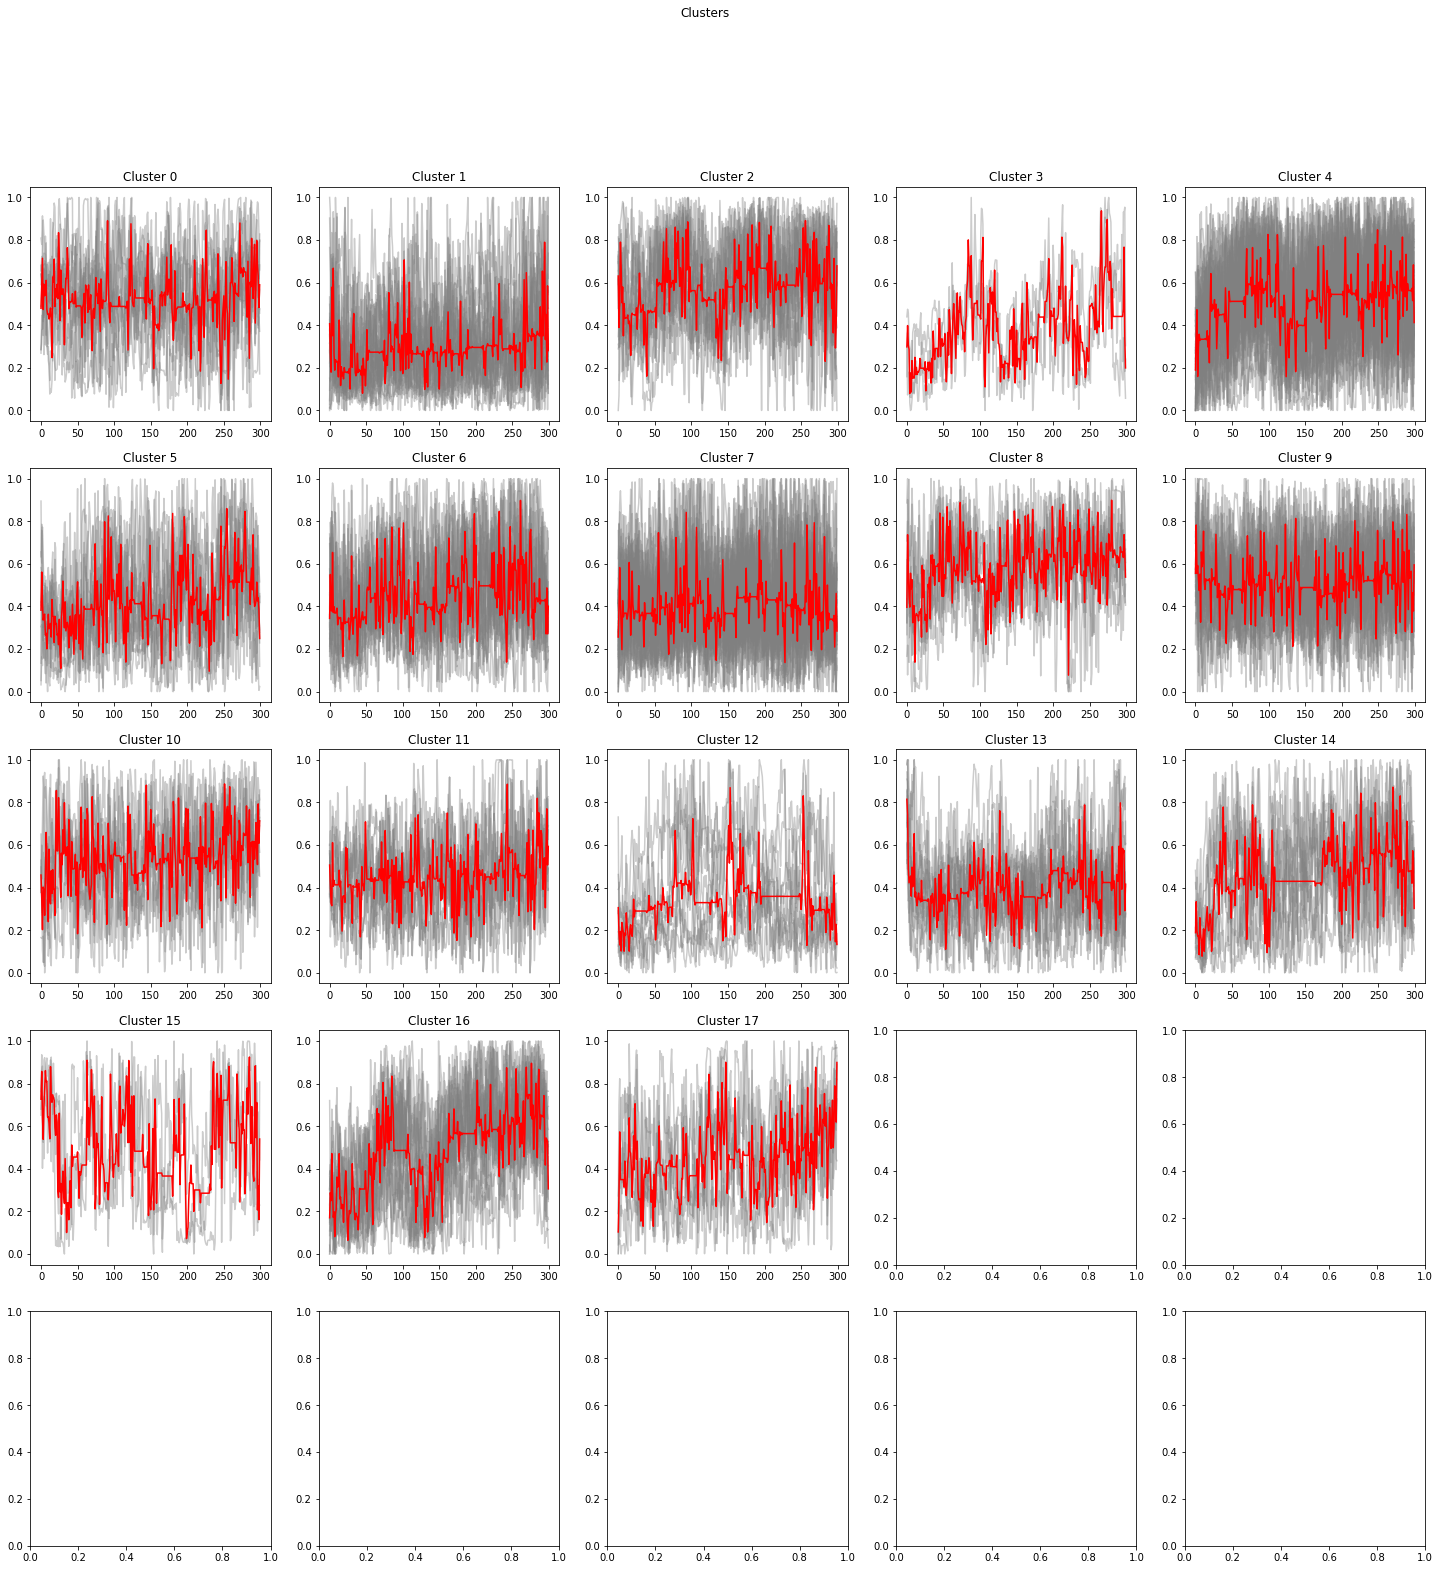

In [15]:
plot_count = math.ceil(math.sqrt(cluster_count))

fig, axs = plt.subplots(plot_count,plot_count,figsize=(25,25))
fig.suptitle('Clusters')
row_i=0
column_j=0
for label in set(labels):
    cluster = []
    for i in range(len(labels)):
            if(labels[i]==label):
                axs[row_i, column_j].plot(mySeries[i],c="gray",alpha=0.4)
                cluster.append(mySeries[i])
    if len(cluster) > 0:
        axs[row_i, column_j].plot(dtw_barycenter_averaging(np.vstack(cluster)),c="red")
    axs[row_i, column_j].set_title("Cluster "+str(row_i*som_y+column_j))
    column_j+=1
    if column_j%plot_count == 0:
        row_i+=1
        column_j=0
        
plt.show()

In [16]:
labels

array([11,  9,  1,  4, 17,  7, 10, 14,  7,  4, 11,  7,  7,  1, 16,  2,  9,
        4, 13,  6,  9,  2, 14,  4,  4,  0,  7,  7,  4,  4, 14,  4,  4,  5,
        1,  4,  1,  5,  5,  0,  7, 12,  7,  2,  1,  2,  7,  9,  6, 13, 11,
        5,  1,  9,  2,  0, 13,  4,  9,  6,  4,  7,  1,  6,  7, 17,  9, 10,
        8, 11,  8,  7,  5, 13,  7, 12,  0,  3,  7,  8,  4,  1,  9,  4,  4,
       15,  2,  1, 17,  3,  4,  1, 11,  6, 14,  6,  7,  9, 16,  6,  7,  4,
        6,  9,  4, 12,  9,  4,  7,  4, 14, 14,  7,  6, 16, 16, 12,  4,  1,
        7,  4, 12, 16,  7,  9, 16,  4,  9,  5,  9, 11,  6,  0,  4,  9,  6,
        4,  4,  6,  0,  9,  7, 16,  8, 17,  1, 17,  7,  7,  6,  3,  7,  4,
        7,  9,  1, 13,  7,  4,  2,  1, 16,  0,  7,  4,  2,  8, 10,  2,  9,
       13,  0,  9,  4,  9,  4, 15, 13,  9,  9, 10,  1,  8, 15,  7,  6,  9,
        5, 16,  4,  4,  4,  4,  7, 12,  7, 13,  4, 14,  4,  7,  1, 13,  0,
        1,  7,  1,  0,  2, 13,  1, 12, 13,  7,  7,  1, 16,  7, 16,  5,  4,
        7,  0,  4,  6, 11

In [17]:
song_cnt = (len(mySeries))
index_list = list(range(0, song_cnt, 1))

In [18]:
fancy_names_for_labels = [f"Cluster {label}" for label in labels]
test_df = pd.DataFrame({"Series": namesofMySeries, "Cluster": fancy_names_for_labels}, index=index_list).sort_values(by="Cluster")

In [19]:
# 다운로드 받은 노래가 속한 cluster
for i in range(0, song_cnt):
    if test_df.loc[i][0] == song_name:
        print(test_df[test_df["Cluster"] == test_df.loc[i][1]])

                                                Series     Cluster
67                            YOASOBI 삼원색.3gpp.mp3.wav  Cluster 10
180                                     내게 완벽을 바란다면 가사  Cluster 10
167  계속 한 밤중이면 좋을텐데 저혈 볼트 MV（ZUTOMAYO - FASTENING）....  Cluster 10
243                                                 안녕  Cluster 10
251  이 노래 모르는 사람 없게 해주세요  Peder Elias - Loving You ...  Cluster 10
6                                 alan walker the drum  Cluster 10
283  프로미스나인 (fromis_9) WE GO Performance Video.3gpp...  Cluster 10
289        헤이즈 (Heize) - 첫눈에 (First Sight) MV.3gpp.wav  Cluster 10


In [25]:
# 특정 cluster에 속한 노래 확인 방법
test_df[test_df["Cluster"] == "Cluster 11"]

,Series,Cluster
92,[MV]Lemon-米津玄師 Cover by yurisa.3gpp.mp3.wav,Cluster 11
225,시드사운드(SID-Sound) - 여우별 로엘 COVER.3gpp.wav,Cluster 11
277,쿨 애상,Cluster 11
279,태연 ( TAEYEON) - 사계 (Four Seasons) COVER.3gpp.wav,Cluster 11
69,YOASOBI「夜に駆ける」 Official Music Video.3gpp.mp3.wav,Cluster 11
280,태연 (TAEYEON) - 사계 (Four Seasons) (가사 EngRomHan...,Cluster 11
130,【팝송으로 배우는 중국어】 사랑의 마법(爱的魔法).3gpp.wav,Cluster 11
50,official髭男dism Yesterday.3gpp.mp3.wav,Cluster 11
0,(Cloudless) (Yorushika)」│Covered by 김달림과하마발.3g...,Cluster 11
10,back number - 大不正解 (full).3gpp.mp3.wav,Cluster 11
